<span style="font-family:'sans-serif';font-size:40px;color:magenta"> Statistics 130 Homework 8 </span>

Chatbot Chatlog Summary: </br>

In this conversation, you worked on evaluating the performance of two classification models (clf and clf2) using confusion matrices. The goal was to analyze the accuracy, sensitivity, and specificity of these models on a testing dataset (ab_reduced_noNaN_test). After encountering a series of errors related to mismatched labels and feature names, you were able to resolve the issues and successfully generate confusion matrices. </p>

You also compared the confusion matrices of two versions of the model based on different sets of features. The main takeaway was that the confusion matrices derived from the testing data are better because they show how the models generalize to unseen data, providing a more realistic measure of performance compared to the matrices generated from the training data.

### Pre-lecture HW Questions

1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions

(a) The goal of a classification descision tree is to predict a categorical (discrete) outcome. Problems involving classfication usually assigns data points to specific categories based on their labels. Such examples include determining whether a person has a disease or not in medical diagnosis, determining whether a email is spam or not spam, categorizing a buyer into categories based on frequency like "frequent buyer", "occasional buyer", and "one-time shoppers" for targeted advertisement. This contrasts regression problems, which involve predictions using continuous data such as house prices and temperature. </p>
(b) A classification decision tree predicts outcomes by breaking down data into smaller and smaller subsets through a sequence of decisions. The tree sorts data based on if whether the condition is met or not at each node of the tree. 
- The tree starts at the root node which contains the entire data set
- At each step the selects a feature and a threshold to split data into subsets 
- Each subsequent node evaluates one feature and its condition 
- When the data reaches the leaf node, it is classified as one of the two labels such as "positive" or "negative" in a COVID-test. </p>

For multiple linear regression, it predicts a continuous outcome using a linear combination of the feature: $y=b_0+b_1x_1+b_2x_2...+b_nx_n$, where it assumes a linear relationship between features and the outcome. Whereas decision trees are non-linear and predicts categorical outcome by haing data traverse through tree. In short, the key difernce between them is that multiple linear regression uses a global equation to make predictions, whereas classification decision tree uses local rules based on subsets of the data. 


2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

**Accuracy** measures the proportion of true results (both true positives and true negatives) in the population.
>Real-world scenario - accuracy can be used to evaluate General diagnostic tests with balanced classes as it can identiyu false positives and false negatives when they have similar consequences, and the dataset is not biased toward one class.

**Sensitivity** measures the proportion of actual positives that are correctly identified.
>Real-world scenario - sensitivity can be used to screen for cancer where high sensitivity ensures that most actual positive cases (cancer patients) are detected and therefore minimizing missed cases, which is critical in life-threatening conditions.

**Specificity** measures the proportion of actual negatives that are correctly identified.
>Real-world scenario - specificity can be used to evaluate screening for a rare condition before expensive follow-up tests where high specificity minimizes the chances of false positives, avoiding unnecessary stress, cost, and invasive procedures for individuals without the condition.

**Precision** measures the proportion of positive identifications that were actually correct.
>Real-world scenario - precision can be used for spam email detection where high precision ensures that most emails flagged as spam are indeed spam, reducing the risk of misclassifying important legitimate emails as spam (false positives).

3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below

    1. remove `Weight_oz`, `Width`, and `Height`
    2. drop all remaining rows with `NaN` entries
    3. set `Pub` year and `NumPages` to have the type `int`, and `Hard_or_Paper` to have the type `category`

In [11]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [13]:
ab.head()

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight_oz
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,8.0,5.2,1.4,22.4


In [20]:
print(ab_reduced_noNaN.columns)

Index(['Title', 'Author', 'List Price', 'Amazon Price', 'Hard_or_Paper',
       'NumPages', 'Publisher', 'Pub year', 'ISBN-10', 'Thick'],
      dtype='object')


In [22]:
# Drop specified columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Now modify the new DataFrame
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

print(ab_reduced_noNaN.info())

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None


**Explanation for Each Step**
- Column Removal: Unnecessary features (Weight_oz, Width, Height) are dropped early to minimize the scope for missing values and simplify the dataset.
- Missing Value Removal: Rows with NaN are dropped after selecting relevant columns to minimize the loss of useful data.
- Data Type Conversion: Correct data types ensure compatibility with analysis methods (e.g., integers for numerical analysis and categories for classification).

In [23]:
ab.describe()

,List Price,Amazon Price,NumPages,Pub year,Height,Width,Thick,Weight_oz
count,324.000000,325.000000,323.000000,324.000000,321.000000,320.000000,324.000000,316.000000
mean,18.579753,13.333846,335.857585,2002.206790,8.163240,5.585000,0.907716,12.487975
std,14.252829,13.727679,161.984389,10.629002,0.918739,0.874057,0.368625,6.644648
min,1.500000,0.770000,24.000000,1936.000000,5.100000,4.100000,0.100000,1.200000
25%,13.950000,8.600000,208.000000,1998.000000,7.900000,5.200000,0.600000,7.800000
50%,15.000000,10.200000,320.000000,2005.000000,8.100000,5.400000,0.900000,11.200000
75%,19.950000,13.130000,416.000000,2010.000000,8.500000,5.900000,1.100000,16.000000
max,139.950000,139.950000,896.000000,2011.000000,12.100000,9.500000,2.100000,35.200000


4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.</br>

Tell a ChatBot that you are about to fit a "scikit-learn" DecisionTreeClassifier model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree clf using only the List Price variable to predict whether or not a book is a hard cover or paper back book using a max_depth of 2; finally use tree.plot_tree(clf) to explain what predictions are made based on List Price for the fitted clf model </p>

>`y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']`</br>
>`X = ab_reduced_noNaN[['List Price']]`

### Step 1: Splitting the Data into Training and Testing Sets

In [24]:
from sklearn.model_selection import train_test_split

# Split the data
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Report the sizes of the splits
print(f"Training set size: {len(ab_reduced_noNaN_train)} observations")
print(f"Testing set size: {len(ab_reduced_noNaN_test)} observations")

Training set size: 255 observations
Testing set size: 64 observations


In [26]:
# Random sampling for training and testing
ab_reduced_noNaN_train = ab_reduced_noNaN.sample(frac=0.8, random_state=42)
ab_reduced_noNaN_test = ab_reduced_noNaN.drop(ab_reduced_noNaN_train.index)

# Report the sizes of the splits
print(f"Training set size: {len(ab_reduced_noNaN_train)} observations")
print(f"Testing set size: {len(ab_reduced_noNaN_test)} observations")

Training set size: 255 observations
Testing set size: 64 observations


### Step 2: Setting Up the Decision Tree Model

1. `y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']` converts the Hard_or_Paper column into a binary (0/1) variable. It creates a dummy variable where books labeled as "H" (Hardcover) will be `1`, and others (e.g., Paperback) will be `0`. This will allow `scikit-learn` models to read the target variables since it can only read numerical inputs.</br>
2. `X = ab_reduced_noNaN[['List Price']]`extracts the `List Price` column as the sole predictor (independent variable) to be used for training the decision tree. It is formatted as a DataFrame (2D array) because `scikit-learn` expects X to have the shape (n_samples, n_features). 


### Step 3: Fitting the Decision Tree
We will now train a `DecisionTreeClassifier` model using only the `List Price` to predict whether a book is a hardcover (`Hard_or_Paper` = "H") or not.

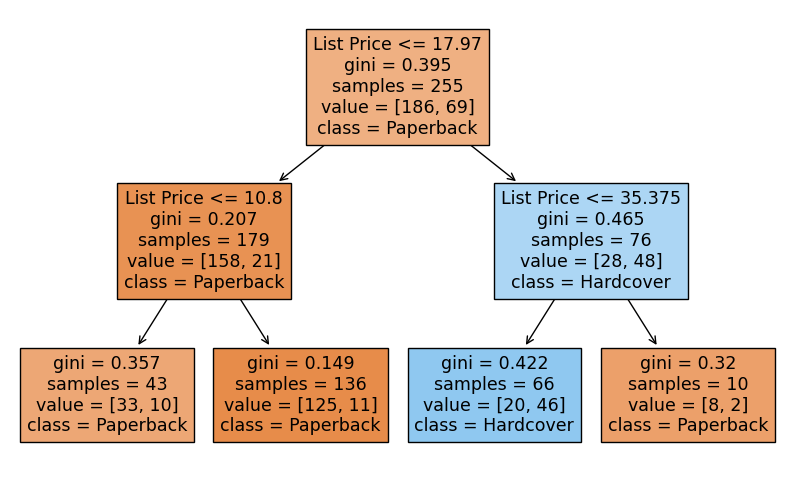

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Define target and predictor variables
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X = ab_reduced_noNaN_train[['List Price']]

# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Visualize the tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()

The decision tree splits the `List Price` into ranges to classify books as either Paperback (class `0`) or Hardcover (class `1`). Each split in the tree is based on the threshold value of `List Price` that maximizes the separation between classes. The tree ends with predictions in the leaf nodes. </p>

*What Predictions Are Made?*</br>
The tree divides books based on the `List Price thresholds` it learns during training.
Each node contains:</br>
- The splitting condition (e.g., List Price <= 25).
- The class distribution of the samples reaching that node.
- The majority class prediction (Paperback or Hardcover).
For instance:</br>
- If `List Price <= 20`, the model might predict `Paperback`.
- If `List Price > 20`, it might predict `Hardcover`.

### Post-lecture HW Questions

5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model

>`X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]`</br>
>`max_depth set to 4`

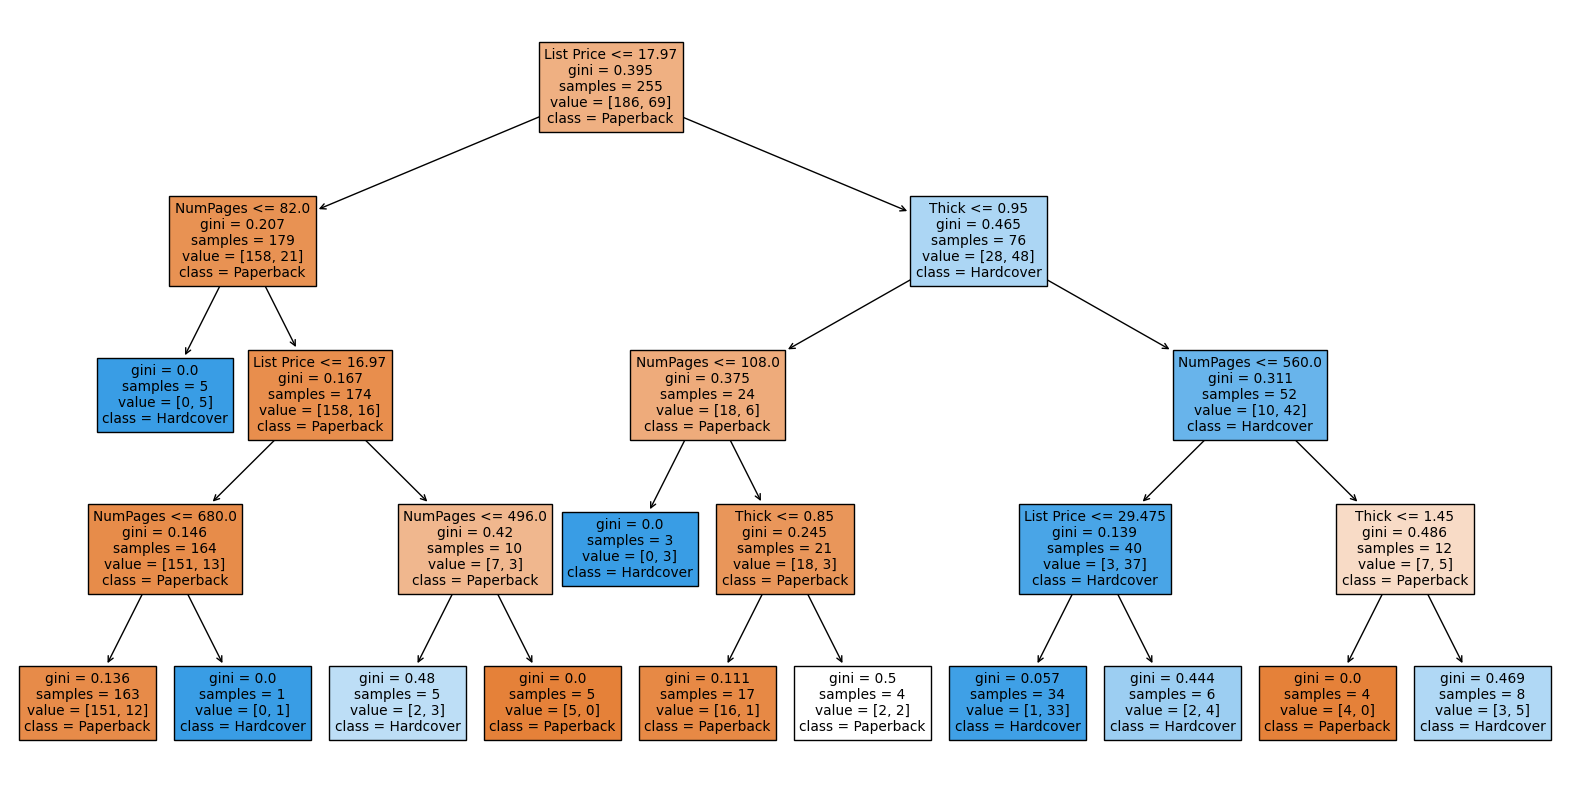

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Define X and y for the training data
X_train = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']

# Initialize and train the Decision Tree model
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Visualize the tree using tree.plot_tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()

The `clf2` decision tree will make predictions based on... </br>
- The tree splits the data into smaller subsets based on conditions applied to the predictor variables (`NumPages`, `Thick`, and `List Price`).
- Each split is chosen to maximize the separation between the two classes (`Paperback` vs. `Hardcover`). </p>

Predictions are made at the leaf nodes:</br>
- Each leaf node represents the final decision for a group of observations.
- The majority class (based on training data) in that node becomes the prediction for new data falling into that group.</p>

For example:</br>
- A book with a `List Price > 50`, `NumPages > 300`, and `Thick = 1` might be classified as a hardcover.
- A book with a `List Price <= 20` might be classified as a paperback.


6. Use previously created `ab_reduced_noNaN_test` to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models

For clf model:
Confusion Matrix:
[[20  0]
 [44  0]]
Accuracy: 0.312
Sensitivity: 1.000
Specificity: 0.000

For clf2 model:
Confusion Matrix:
[[17  3]
 [ 2 42]]
Accuracy: 0.922
Sensitivity: 0.850
Specificity: 0.955



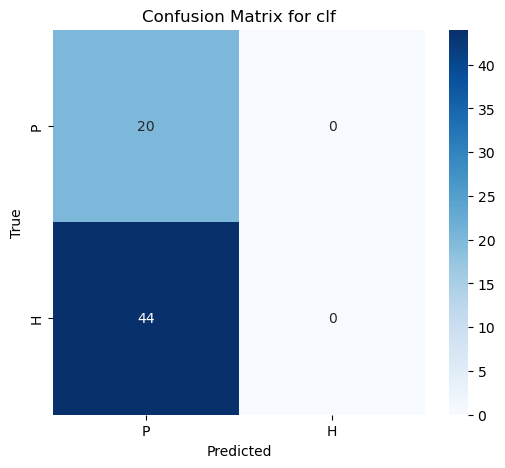

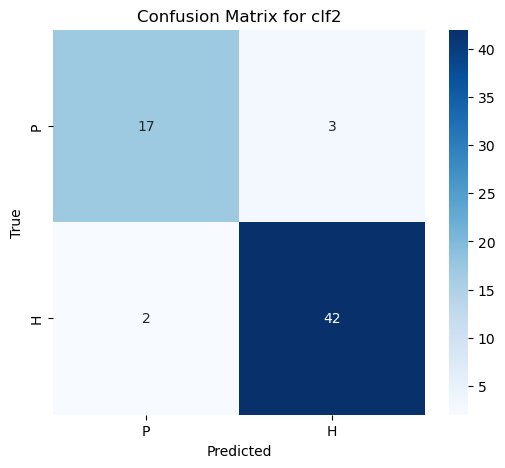

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Assuming clf and clf2 are already trained models
# Predictions for clf model
y_pred_clf = clf.predict(X_test)

# Convert Boolean predictions to categorical labels ('H' and 'P')
y_pred_clf = np.where(y_pred_clf, 'H', 'P')  # Map True to 'H' and False to 'P'

# Calculate confusion matrix and metrics for clf
cm_clf = confusion_matrix(y_test, y_pred_clf)
accuracy_clf = accuracy_score(y_test, y_pred_clf)

# Modify pos_label based on your actual class labels
sensitivity_clf = recall_score(y_test, y_pred_clf, pos_label='H')  # Sensitivity for 'H'
specificity_clf = recall_score(y_test, y_pred_clf, pos_label='P')  # Specificity for 'P'

# For clf2 (same process)
y_pred_clf2 = clf2.predict(X_test)

# Convert Boolean predictions to categorical labels ('H' and 'P')
y_pred_clf2 = np.where(y_pred_clf2, 'H', 'P')  # Map True to 'H' and False to 'P'

# Calculate confusion matrix and metrics for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

# Modify pos_label based on your actual class labels
sensitivity_clf2 = recall_score(y_test, y_pred_clf2, pos_label='H')  # Sensitivity for 'H'
specificity_clf2 = recall_score(y_test, y_pred_clf2, pos_label='P')  # Specificity for 'P'

# Print results
print("For clf model:")
print(f"Confusion Matrix:\n{cm_clf}")
print(f"Accuracy: {accuracy_clf:.3f}")
print(f"Sensitivity: {sensitivity_clf:.3f}")
print(f"Specificity: {specificity_clf:.3f}\n")

print("For clf2 model:")
print(f"Confusion Matrix:\n{cm_clf2}")
print(f"Accuracy: {accuracy_clf2:.3f}")
print(f"Sensitivity: {sensitivity_clf2:.3f}")
print(f"Specificity: {specificity_clf2:.3f}\n")

# Confusion Matrix Visualization for clf
plt.figure(figsize=(6, 5))
sns.heatmap(cm_clf, annot=True, fmt='d', cmap='Blues', xticklabels=['P', 'H'], yticklabels=['P', 'H'])
plt.title('Confusion Matrix for clf')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix Visualization for clf2
plt.figure(figsize=(6, 5))
sns.heatmap(cm_clf2, annot=True, fmt='d', cmap='Blues', xticklabels=['P', 'H'], yticklabels=['P', 'H'])
plt.title('Confusion Matrix for clf2')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Interpreting Results:
- Confusion Matrix: Indicates the number of TPs, TNs, FPs, and FNs for each model.
- Sensitivity: Measures how well the model identifies the positive class (Hardcover).
- Specificity: Measures how well the model identifies the negative class (Paperback).
- Accuracy: Overall correctness of the model.

7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better

In [ ]:
#ConfusionMatrixDisplay(
    #confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     #clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     #labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
#ConfusionMatrixDisplay(
    #confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     #clf.predict(
                         #ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     #labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

The difference between the two confusion matrices below is that in the first confusion matrix, the model is trained with only the `List Price` feature, which potentially underfits the data, leading to less accuracy. Whereas in the second confusion matrix, additional features like `NumPages` and `Thick` are added, which provides more information to the model, leading to potentially better performance if those features are relevant to the outcome variable. The confusion matrices for `clf` and `clf2` are better than the confusion matrices below because they show performance of the trained models on out-of-sample data which gives a better sense of how generalizable and accurate the models are. 